In [7]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

#데이터 다운로드
(train_data, train_labels), (test_data, test_labels)  = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

In [2]:
#원-핫 인코딩으로 변환하는 함수 
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
            results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

In [3]:
#신경망 모델 구축
from keras.layers import Input, Dense, Dropout
from keras.models import Model

inputs = Input(shape=(1000,))
x = Dense(16, activation="relu")(inputs)
a = Dropout(0.5)(x)
y = Dense(16, activation="relu")(a)
b = Dropout(0.5)(y)
prediction = Dense(1, activation="sigmoid")(b)

model = Model(inputs=inputs, outputs=prediction)
model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [4]:
#신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                   train_labels,
                   epochs=20,
                   batch_size=512,
                   validation_data=(test_data, test_labels),
                   verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6829 - accuracy: 0.5533 - val_loss: 0.6404 - val_accuracy: 0.7175 - 2s/epoch - 32ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6107 - accuracy: 0.6732 - val_loss: 0.5214 - val_accuracy: 0.8158 - 294ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5318 - accuracy: 0.7504 - val_loss: 0.4297 - val_accuracy: 0.8412 - 305ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4687 - accuracy: 0.7988 - val_loss: 0.3718 - val_accuracy: 0.8514 - 232ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4293 - accuracy: 0.8240 - val_loss: 0.3461 - val_accuracy: 0.8557 - 237ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3995 - accuracy: 0.8352 - val_loss: 0.3353 - val_accuracy: 0.8590 - 232ms/epoch - 5ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3781 - accuracy: 0.8465 - val_loss: 0.3276 - val_accuracy: 0.8606 - 231ms/epoch - 5ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3694 - accuracy: 0.8535 - val_loss: 0.3250 - val_accuracy: 0.8611 - 236ms/epoch - 5ms/step
Epoch 9/20
49/49 -

In [5]:
#훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)


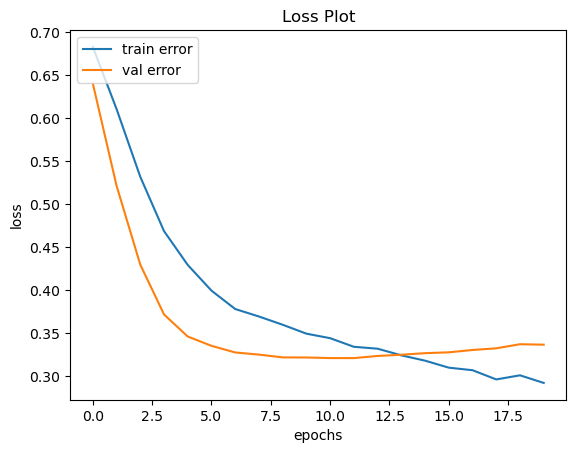

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()